In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [77]:
disease = pd.read_csv('./Heart_Disease.csv')
disease.columns = disease.columns.str.replace(' ', '_')

In [78]:
print("Shape of the disease dataframe", disease.shape)

Shape of the disease dataframe (10001, 15)


In [79]:
print(disease.head())

    Age  Gender  Blood_Pressure  Cholesterol_Level Exercise_Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Diabetes        BMI Alcohol_Consumption Stress_Level  Sleep_Hours  \
0       No  24.991591                High       Medium     7.633228   
1      Yes  25.221799              Medium         High     8.744034   
2       No  29.855447                 Low          Low     4.440440   
3       No  24.130477                 Low         High     5.249405   
4      Yes  20.486289                 Low         High     7.030971   

  Sugar_Consumption  CRP_Level  Homocysteine_Level Heart_Disease_Status  
0            Medium  12.969246

In [80]:
disease = disease.drop('Sugar_Consumption', axis = 1)

In [81]:
print(disease.head())

    Age  Gender  Blood_Pressure  Cholesterol_Level Exercise_Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Diabetes        BMI Alcohol_Consumption Stress_Level  Sleep_Hours  \
0       No  24.991591                High       Medium     7.633228   
1      Yes  25.221799              Medium         High     8.744034   
2       No  29.855447                 Low          Low     4.440440   
3       No  24.130477                 Low         High     5.249405   
4      Yes  20.486289                 Low         High     7.030971   

   CRP_Level  Homocysteine_Level Heart_Disease_Status  
0  12.969246           12.387250                

In [82]:
disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9972 non-null   float64
 1   Gender                9982 non-null   object 
 2   Blood_Pressure        9982 non-null   float64
 3   Cholesterol_Level     9971 non-null   float64
 4   Exercise_Habits       9976 non-null   object 
 5   Smoking               9976 non-null   object 
 6   Diabetes              9971 non-null   object 
 7   BMI                   9979 non-null   float64
 8   Alcohol_Consumption   7415 non-null   object 
 9   Stress_Level          9979 non-null   object 
 10  Sleep_Hours           9976 non-null   float64
 11  CRP_Level             9975 non-null   float64
 12  Homocysteine_Level    9981 non-null   float64
 13  Heart_Disease_Status  10001 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [83]:
disease.isna().sum()

Age                       29
Gender                    19
Blood_Pressure            19
Cholesterol_Level         30
Exercise_Habits           25
Smoking                   25
Diabetes                  30
BMI                       22
Alcohol_Consumption     2586
Stress_Level              22
Sleep_Hours               25
CRP_Level                 26
Homocysteine_Level        20
Heart_Disease_Status       0
dtype: int64

In [84]:
disease.describe()

,Age,Blood_Pressure,Cholesterol_Level,BMI,Sleep_Hours,CRP_Level,Homocysteine_Level
count,9972.000000,9982.000000,9971.000000,9979.000000,9976.000000,9975.000000,9981.000000
mean,49.296931,149.758065,225.418514,29.076859,6.991394,7.472752,12.456264
std,18.193182,17.572119,43.579331,6.306915,1.753119,4.340379,4.323209
min,18.000000,120.000000,150.000000,18.002837,4.000605,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658566,5.449953,3.674260,8.724180
50%,49.000000,150.000000,226.000000,29.076905,7.003569,7.472201,12.408794
75%,65.000000,165.000000,263.000000,34.518614,8.531491,11.257019,16.140456
max,80.000000,180.000000,300.000000,39.996954,9.999952,14.997087,19.999037


In [85]:
cat_cols = ['Gender', 'Exercise_Habits', 'Smoking', 'Diabetes', 'Alcohol_Consumption', 'Stress_Level', 'Heart_Disease_Status']
le = LabelEncoder()
for col in cat_cols:
    disease[col] = le.fit_transform(disease[col])
disease.fillna(disease.mean(numeric_only=True), inplace=True)

In [86]:
numerical_columns = disease.select_dtypes(exclude = 'object')

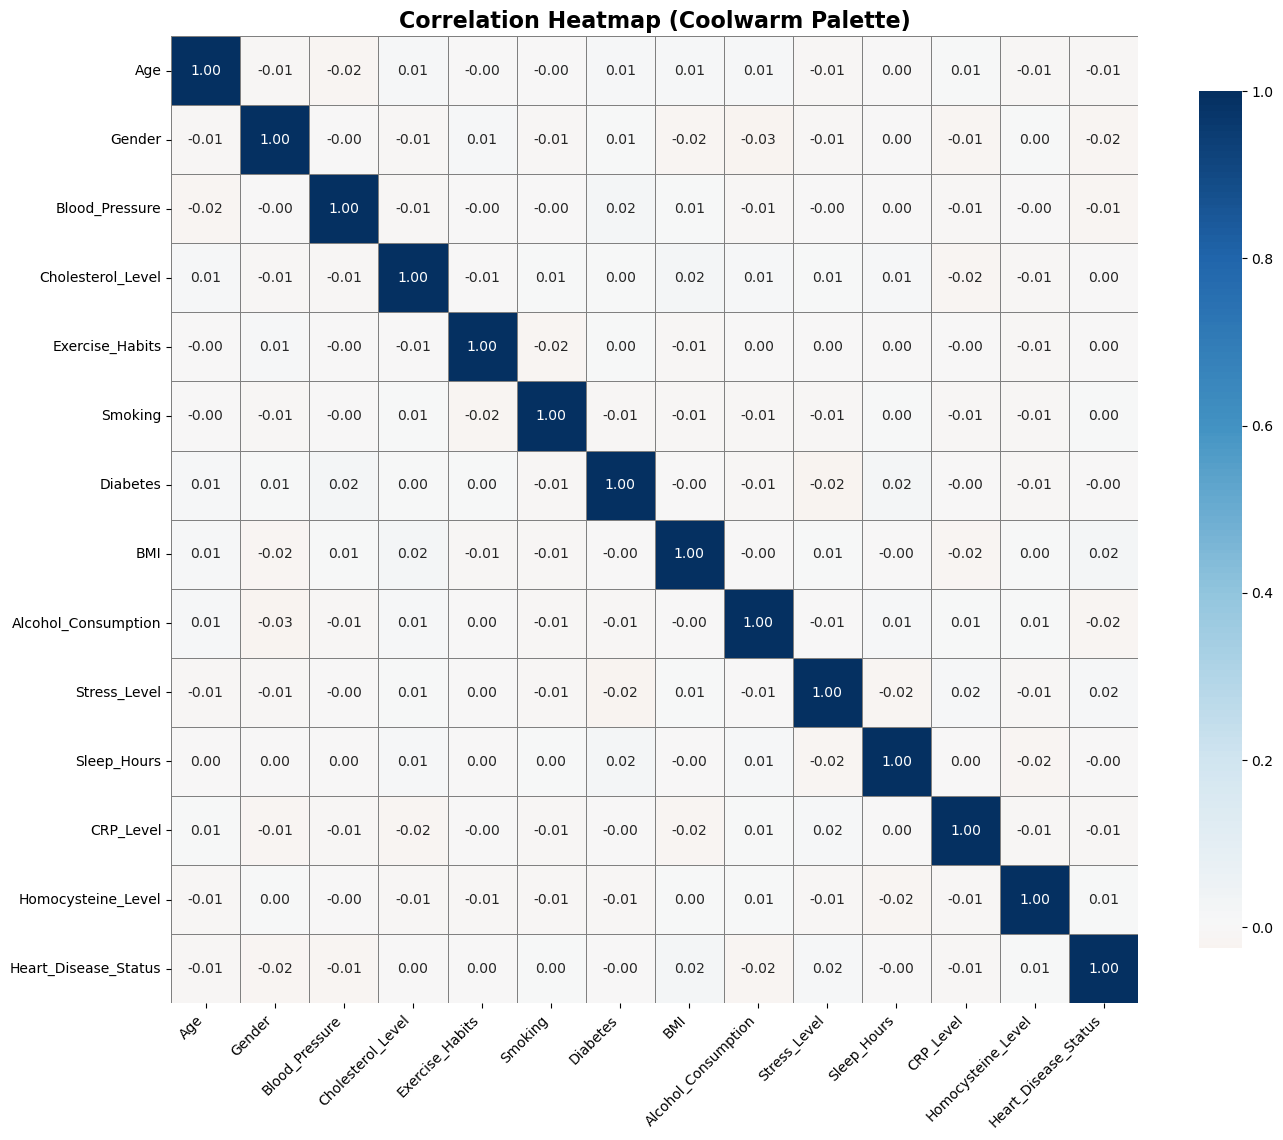

In [87]:


plt.figure(figsize=(14, 12))
sns.heatmap(
    disease.corr(numeric_only=True),
    annot=True,
    fmt=".2f",
    cmap="RdBu",         
    center=0,
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap (Coolwarm Palette)", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


In [88]:
import pandas as pd
import plotly.express as px

df = disease.copy() 


df['Heart_Disease_Status'] = df['Heart_Disease_Status'].replace({0: 'No', 1: 'Yes'})


grouped = df.groupby(['Smoking', 'Stress_Level', 'Heart_Disease_Status']).size().reset_index(name='Count')
grouped['Proportion'] = grouped.groupby(['Smoking', 'Stress_Level'])['Count'].transform(lambda x: x / x.sum())


grouped['Group'] = grouped['Smoking'].astype(str) + ' + ' + grouped['Stress_Level'].astype(str)


color_map = {
    'No': '#ffaf00',   # Light Blue
    'Yes': '#f46920'   # Light Pink
}


fig = px.bar(grouped,
             x='Group',
             y='Proportion',
             color='Heart_Disease_Status',
             color_discrete_map=color_map,
             barmode='stack',
             title="Smoking + Stress Level vs Heart Disease Status",
             labels={
                 'Proportion': 'Proportion of Cases',
                 'Group': 'Smoking + Stress Level Combination',
                 'Heart_Disease_Status': 'Heart Disease Status'
             })

fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='Heart Disease Status'
)

fig.show()


In [89]:
X = disease.drop('Heart_Disease_Status', axis=1)
y = disease['Heart_Disease_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7721139430284858
[[1517  103]
 [ 353   28]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1620
           1       0.21      0.07      0.11       381

    accuracy                           0.77      2001
   macro avg       0.51      0.50      0.49      2001
weighted avg       0.70      0.77      0.72      2001



In [90]:
dt = DecisionTreeClassifier(max_depth=5, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8045977011494253
[[1610   10]
 [ 381    0]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1620
           1       0.00      0.00      0.00       381

    accuracy                           0.80      2001
   macro avg       0.40      0.50      0.45      2001
weighted avg       0.65      0.80      0.72      2001



In [91]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)


DecisionTreeClassifier(max_depth=3, random_state=42)

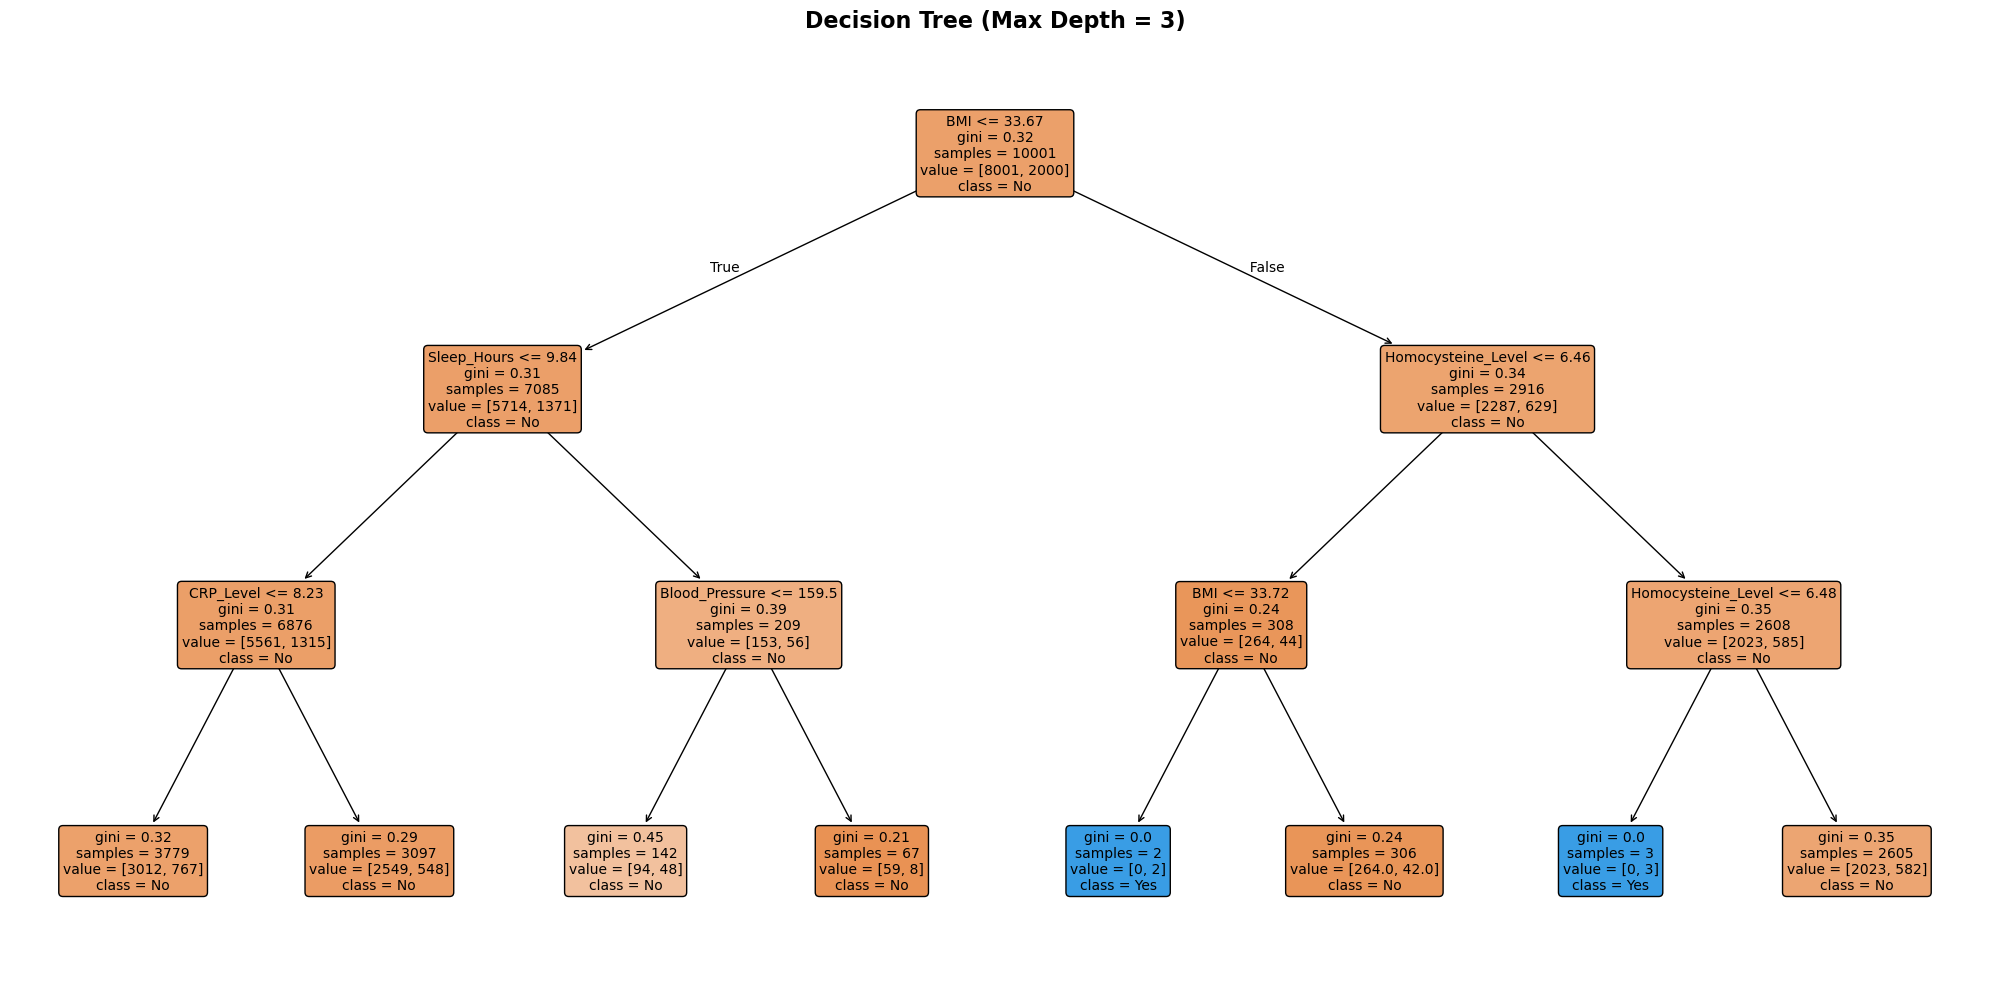

In [92]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    precision=2,
    fontsize=10,
    max_depth=3  
)
plt.title('Decision Tree (Max Depth = 3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


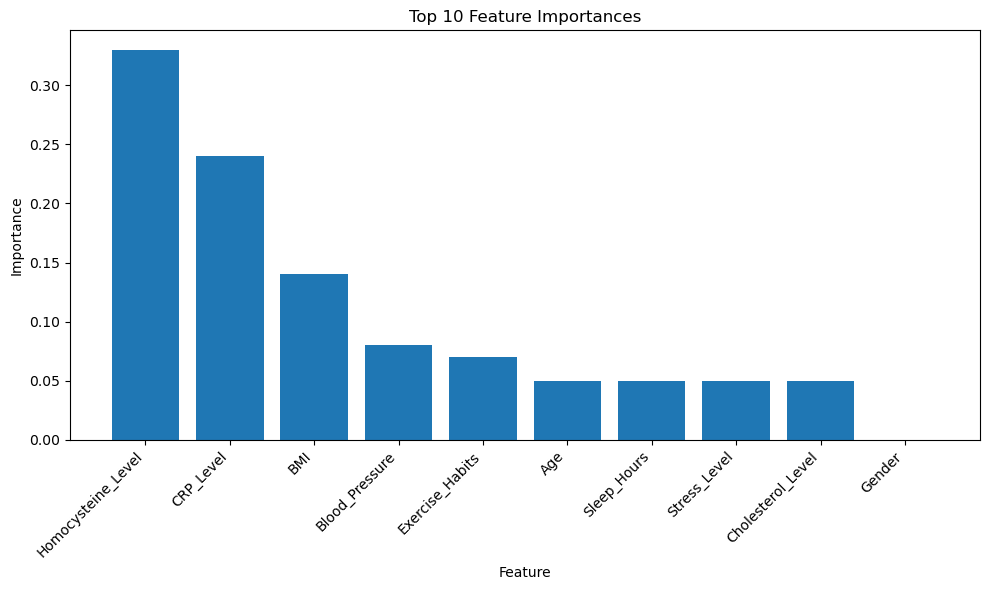

In [93]:
features = ['Homocysteine_Level', 'CRP_Level', 'BMI', 'Blood_Pressure', 'Exercise_Habits',
            'Age', 'Sleep_Hours', 'Stress_Level', 'Cholesterol_Level', 'Gender']
importances = [0.33, 0.24, 0.14, 0.08, 0.07, 0.05, 0.05, 0.05, 0.05, 0.00]


plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


In [94]:
reg_features = ['CRP_Level', 'Sleep_Hours']
X_reg = disease[reg_features]
y_reg = disease['Heart_Disease_Status']
X_scaled = StandardScaler().fit_transform(X_reg)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=1)
models = {'LinearRegression': LinearRegression(), 'Lasso': Lasso(alpha=0.1), 'Ridge': Ridge(alpha=1.0)}
for name, model in models.items():
    model.fit(X_train_r, y_train_r)
    y_pred = model.predict(X_test_r)
    print(f"{name} R2 Score:", model.score(X_test_r, y_test_r))
    print(f"{name} Coefficients:", model.coef_)

LinearRegression R2 Score: -0.0007947257050497925
LinearRegression Coefficients: [-0.00124265 -0.00135596]
Lasso R2 Score: -0.0009295166523135556
Lasso Coefficients: [-0. -0.]
Ridge R2 Score: -0.0007947397724301641
Ridge Coefficients: [-0.0012425  -0.00135579]
